In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# EDA MASTER FILE

## Lecture 1

In [79]:
# Numpy matrix multiplication
# either @ or .dot()
a=np.array([1,2,3])
b=np.array([4,5,6])
print(a@b)
print(a.dot(b))

32
32


In [80]:
c = pd.Series(['Xue','Mary','Ollie']) 
c.str.lower() #convert uppercases to lowercases

#df['features'] = df['features'].astype(str) #change to string
#df['features'] = df['features'].str.lower() #change all letters to lower cases to uniform strings
#" hi MSDS 593!".strip().split() # gets a list of words

0      xue
1     mary
2    ollie
dtype: object

In [81]:
d = pd.Series([10,2.4,81,1005], index=['t','u','v','w'])
d

t      10.0
u       2.4
v      81.0
w    1005.0
dtype: float64

<div class="alert alert-block alert-success">
    
The main distinction between `loc` and `iloc` is: `loc` is label-based, which means that you have to specify rows and columns based on their row and column labels. `iloc` is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position)
    
</div>

In [82]:
d.loc[['u','w']] # a list of indice ['u','w']
#a.loc[a<100]

u       2.4
w    1005.0
dtype: float64

### N/A

In [83]:
#c.fillna(1000)
#d.loc[~d.isnull()] # finding values that are not null

In [84]:
# indexing both columns and rows in dataframe
    #df[row,column]
#df_status = df_status.set_index('Date')   
#df_status = df_status.reset_index()

In [85]:
# DOUBLE INDEX WEIRD NOTATION
#df_titanic[df_titanic["Embarked"].isnull()].index
#df_titanic[df_titanic.isnull().sum(axis=1)>0].index

#df_rent['price']<= 10000
#df = df_rent[(df_rent['price'] <= 10000) & (df_rent['price'] > 100)].copy() 

# DROPPING A COLUMN
#df_status.drop('junk', axis=1)

# SOMETIMES, NECESSARY TO MAKE A COPY
#df_x = df_status.iloc[5:10].copy()

### Frequency Table

In [86]:
#define frequency table
df_cars = pd.read_csv('/Users/arjunbedi/Documents/gradSchool/bootcamp/edaViz/lectures/lecture1/cars.csv')
tab = pd.crosstab(index=df_cars['CYL'], columns='count')
print(tab)
#df_cars.describe

col_0  count
CYL         
3          4
4        199
5          3
6         83
8        103


### GOING TO KEEP ALL THE DATETIME STUFF IN L1.B (will add to repository)

## LEcture 2

In [87]:
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
# Get a list of all mpg values for three specific cylinder sizes
# Get read for boxplot
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values

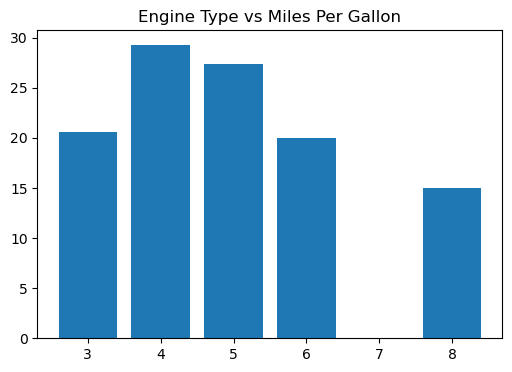

In [88]:
cyl = sorted(df_cars['CYL'].unique())

fig, ax = plt.subplots(figsize=(6,4)) 
ax.bar(cyl, avg_mpg) 
plt.title("Engine Type vs Miles Per Gallon")
plt.show()

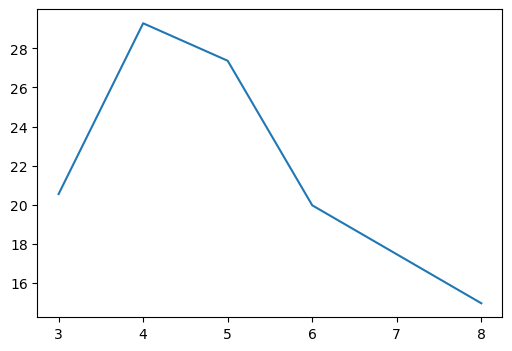

In [89]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(avg_mpg) 
# CAN DO ANOTHER LINEPLOT HERE, if you want to add another line
#ax.plot(avg_mpg_forcyl_4) 
plt.show()

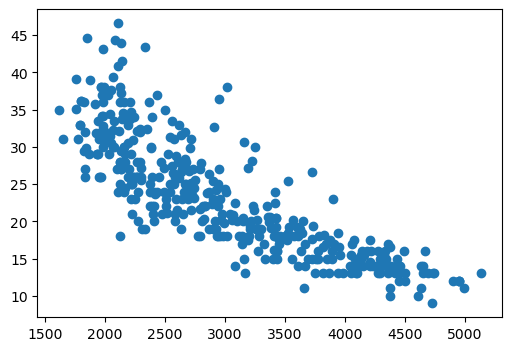

In [90]:
fig, ax = plt.subplots(figsize=(6,4)) 
ax.scatter(df_cars['WGT'], df_cars['MPG'])
plt.show()

In [91]:
df_titanic = pd.read_csv("/Users/arjunbedi/Documents/gradSchool/bootcamp/edaViz/lectures/lecture2/titanic.csv")
survived_count = df_titanic["Survived"].value_counts()
survived_count

Survived
0    549
1    342
Name: count, dtype: int64

In [92]:
new_tab = pd.crosstab(index=df_titanic['Pclass'], columns=df_titanic["Survived"])
new_tab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


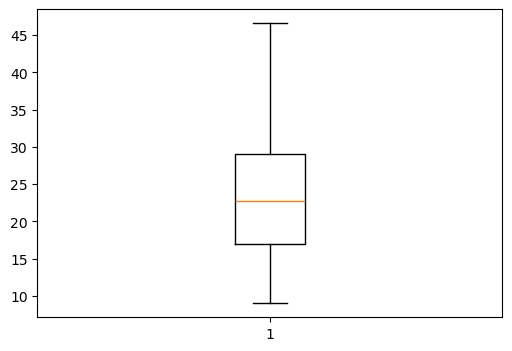

In [93]:
fig, ax = plt.subplots(figsize=(6,4)) 
ax.boxplot(df_cars['MPG'])
plt.show()

# Multiple of them
# df_mpg_cyl=[cyl4,cyl6,cyl8]

# fig, ax = plt.subplots(figsize=(6,4))
# ax.boxplot(df_mpg_cyl)
# plt.show()

In [94]:
C = df_cars.corr()
C

,MPG,CYL,ENG,WGT
MPG,1.000000,-0.777618,-0.805127,-0.832244
CYL,-0.777618,1.000000,0.950823,0.897527
ENG,-0.805127,0.950823,1.000000,0.932994
WGT,-0.832244,0.897527,0.932994,1.000000


In [95]:
# TITLES
#ax.set_xlabel("Weight (lbs)")
#ax.set_ylabel("Count")
#ax.set_title("Weight histogram")

## LECTURE 3

In [96]:
# coordinate dataframe
# df = df[(df['latitude']>40.55) &
#         (df['latitude']<40.94) &
#         (df['longitude']>-74.1) &
#         (df['longitude']<-73.67)].copy()
# print(len(df), len(df_rent))

In [97]:
# Quantile
df_cars['WGT'].quantile([0.0,0.25,0.5,0.75,1.0])

0.00    1613.00
0.25    2225.25
0.50    2803.50
0.75    3614.75
1.00    5140.00
Name: WGT, dtype: float64

In [98]:
# REORDERING
#df['interest_level'] = df['interest_level'].cat.reorder_categories(['low','medium','high'])

In [99]:
#put two histograms side by side

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# axes[0].hist(df['bedrooms'])
# axes[0].set_xlabel("bedrooms")
# axes[1].hist(df['bathrooms'])
# axes[1].set_xlabel("bathrooms")
# #plt.tight_layout() #  if your plots look overlapping, you can try this
# plt.show()

In [100]:
# BOOLEAN COLUMNS
# df['doorman'] = df['features'].str.contains('doorman')
# df['laundry'] = df['features'].str.contains('laundry')
# df['parking'] = df['features'].str.contains('parking')
# df['hardwood'] = df['features'].str.contains('hardwood')

## Lecture 4

In [101]:
# sorting values
# df_bull = pd.read_csv('Bull.csv', dtype=dtypes, parse_dates=['saledate'])
# df_bull = df_bull.sort_values('saledate') # let's order them by sale date
# df_bull.head(2).T

In [102]:
# DEALING WITH MISSING VALUES
# m = df['Tire_Size'].median()  # 20.5
# df['Tire_Size'] = df['Tire_Size'].fillna(m)
# df['Tire_Size'].unique()

#ax.axvline(1995, c='red', lw=.8) #add a vertical line for median

There's one last problem with this column. Some records indicate that the bulldozer was sold before it was made. Allow me to introduce a new way to do queries with pandas, instead of using the index operator `[...]`; it's called `query(...)`:

In [103]:
#sold_before_made = df_yr_ok.query("saledate.dt.year < YearMade")
#sold_before_made[['SalePrice','YearMade','saledate']]

## LECTURE 6

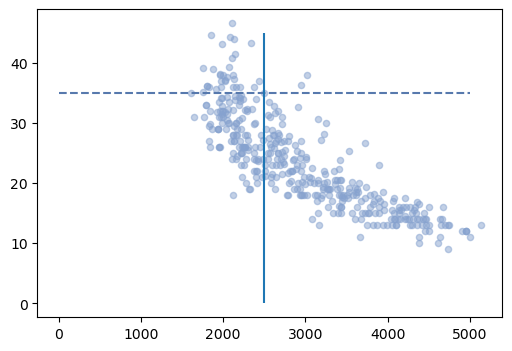

In [104]:
# Similarly,  we can change the color,size and transparency level of the dots
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c='#86a2cf', s=20, alpha=0.5)
ax.hlines(y=35,xmin=0,xmax=5000,colors='#5779AD', linestyles='dashed', lw=1.5, label='Average MPG')
ax.vlines(x=2500,ymin=0,ymax=45)
plt.show()


# my = df_cars['MPG'].mean()
# #Add color scheme by condition: if MPG<mean, '#E2E5EA', ow '#E15F32'
# col = np.where(df_cars['MPG']<my, '#E2E5EA', '#E15F32')



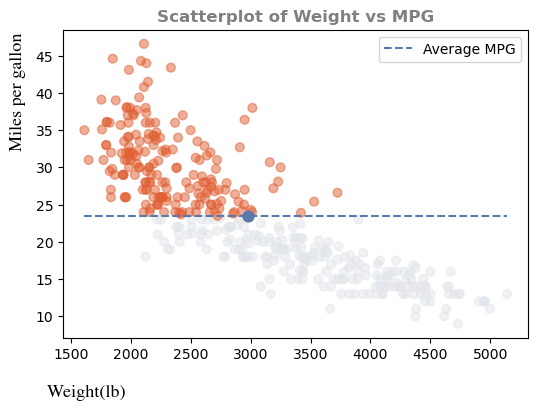

In [105]:
#Calculate the mean MPG and mean WGT
my = df_cars['MPG'].mean()
mx = df_cars['WGT'].mean()

#Add color scheme by condition: if MPG<mean, '#E2E5EA', ow '#E15F32'
col = np.where(df_cars['MPG']<my, '#E2E5EA', '#E15F32')

#Draw scatter plot, use col as our color scheme
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c=col, s=40, alpha=0.5)

#Add horizontal line to indicate mean MPG
wgt=df_cars['WGT']
ax.hlines(y=my, xmin=wgt.min(), xmax=wgt.max(), 
          colors='#5779AD', linestyles='dashed', lw=1.5, label='Average MPG')

#Add the a reference point to indicate mean MPG and mean WGT
ax.scatter(mx, my, c='#5779AD', s=60) #plot the point

#Show legend for the label of the line
ax.legend(loc="upper right")

# #Add title, xlabel and ylabel
ax.set_xlabel("Weight(lb)",fontsize=13, fontname="Times")
ax.set_ylabel("Miles per gallon",fontsize=13, fontname="Times")
ax.set_title("Scatterplot of Weight vs MPG",c='grey', weight = 'bold')

#set x label position to bottom left
ax.xaxis.set_label_coords(0.05, -0.15) 
#set y label position to top right
ax.yaxis.set_label_coords(-0.08, 0.8)


plt.show()

LINE PLOT WITH LABELS, COORDINATES, XTICKS

In [106]:
# month = ['Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20', 'Jan 21', 'Feb 21' ]
# fig, ax = plt.subplots(figsize=(10,4))

# #change the color and size of the line. Note here the size of a line is lw(line width)
# ax.plot(df_avg, c='#658da3', lw=3)

# # #set xtick labels
# ax.set_xticklabels(month)

# #set y label
# ax.set_ylabel('Average Daily Count per Month',c='grey', weight = 'bold')
# #set y label position
# ax.yaxis.set_label_coords(-0.08, 0.7)

# #set title
# ax.set_title("Average Monthly Count of Confirmed Covid Cases",c='grey', weight = 'bold')

# #hide the frames, only show x and y axis
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.show()

In [107]:
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

TO GIVE THE BORDER EFFECT ON A LINEPLOT

In [108]:
# #add min and max
# ax.plot(df_more.index, df_more['min'], c='#e4e7eb', lw=1)
# ax.plot(df_more.index, df_more['max'], c='#e4e7eb', lw=1)

# #fill between min and max
# ax.fill_between(df_more.index,df_more['min'], df_more['max'],facecolor='#e4e7eb')